# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | usogorsk
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | meadow lake
Processing Record 9 of Set 1 | sarikei
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | nadi
Processing Record 13 of Set 1 | vilhena
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | qurayyat
Processing Record 16 of Set 1 | mormugao
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | iqaluit
Proces

Next box is for testing, delete later

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
city_weather


{'coord': {'lon': 142.3475, 'lat': -3.1374},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 302.78,
  'feels_like': 307.98,
  'temp_min': 302.78,
  'temp_max': 302.78,
  'pressure': 1009,
  'humidity': 73,
  'sea_level': 1009,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 3.16, 'deg': 335, 'gust': 3.58},
 'clouds': {'all': 100},
 'dt': 1699669238,
 'sys': {'country': 'PG', 'sunrise': 1699646833, 'sunset': 1699690919},
 'timezone': 36000,
 'id': 2101169,
 'name': 'Aitape',
 'cod': 200}

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,292.09,34,0,2.28,NZ,1699668616
1,waitangi,-43.9535,-176.5597,285.27,74,82,1.34,NZ,1699668723
2,usogorsk,63.4106,48.6872,273.52,96,33,2.81,RU,1699668724
3,puerto natales,-51.7236,-72.4875,277.93,96,100,2.82,CL,1699668274
4,ushuaia,-54.8000,-68.3000,277.96,87,100,5.14,AR,1699668377


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,292.09,34,0,2.28,NZ,1699668616
1,waitangi,-43.9535,-176.5597,285.27,74,82,1.34,NZ,1699668723
2,usogorsk,63.4106,48.6872,273.52,96,33,2.81,RU,1699668724
3,puerto natales,-51.7236,-72.4875,277.93,96,100,2.82,CL,1699668274
4,ushuaia,-54.8000,-68.3000,277.96,87,100,5.14,AR,1699668377


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

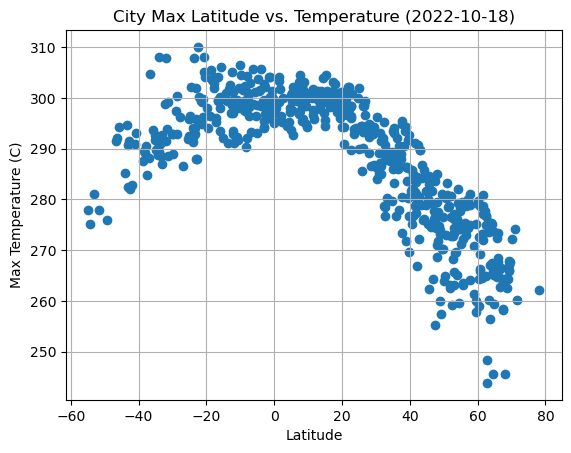

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

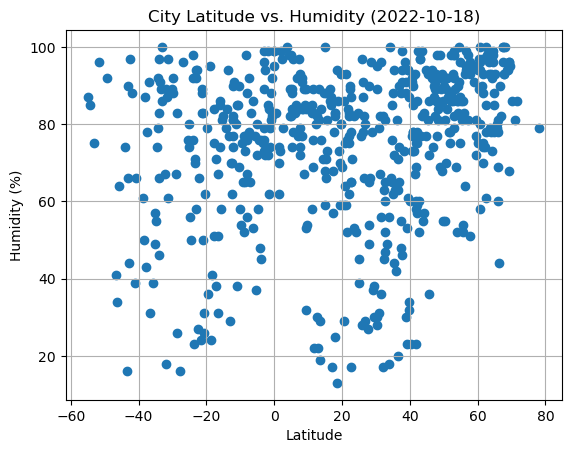

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

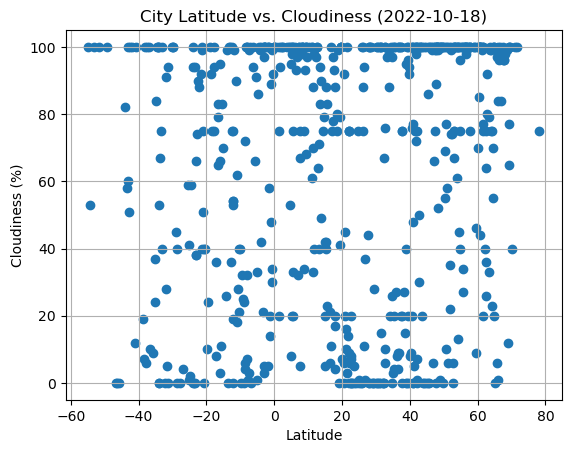

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

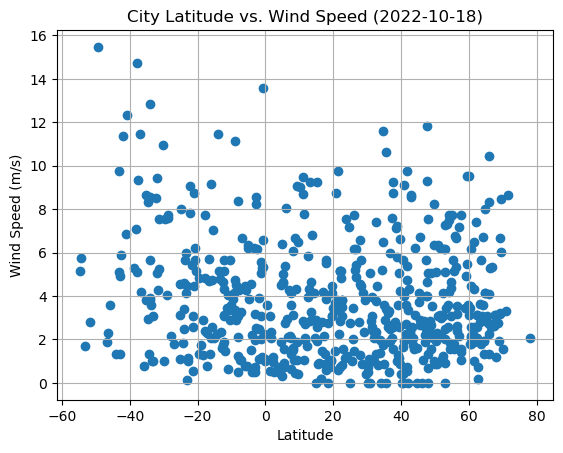

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, y_label, coordinates):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Visualize the plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r-')

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, coordinates,fontsize=15,color="red")
    print(f'The r-value is: {rvalue ** 2}')
    plt.show()



In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,usogorsk,63.4106,48.6872,273.52,96,33,2.81,RU,1699668724
6,meadow lake,34.8014,-106.5436,279.64,76,26,1.76,US,1699668728
7,sarikei,2.1167,111.5167,296.52,99,100,1.20,MY,1699668729
12,petropavlovsk-kamchatsky,53.0452,158.6483,273.48,98,75,2.00,RU,1699668735
13,qurayyat,31.3318,37.3428,287.25,67,0,3.09,SA,1699668735


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,292.09,34,0,2.28,NZ,1699668616
1,waitangi,-43.9535,-176.5597,285.27,74,82,1.34,NZ,1699668723
3,puerto natales,-51.7236,-72.4875,277.93,96,100,2.82,CL,1699668274
4,ushuaia,-54.8000,-68.3000,277.96,87,100,5.14,AR,1699668377
5,blackmans bay,-43.0167,147.3167,290.78,66,60,1.34,AU,1699668727


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7886354795968392


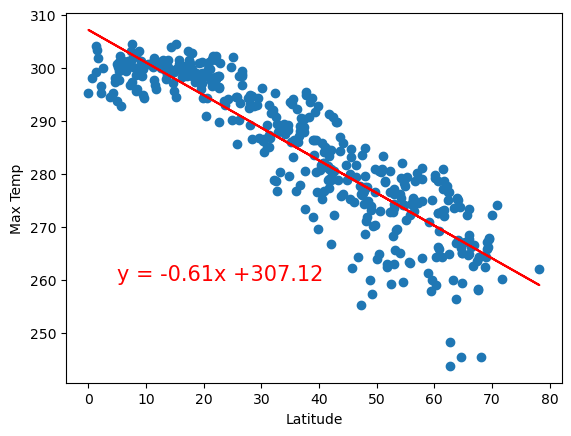

In [67]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_label = "Max Temp"
coordinates = (5,260)

linear_regression_plot(x_values, y_values, y_label, coordinates)


The r-value is: 0.3816732220636071


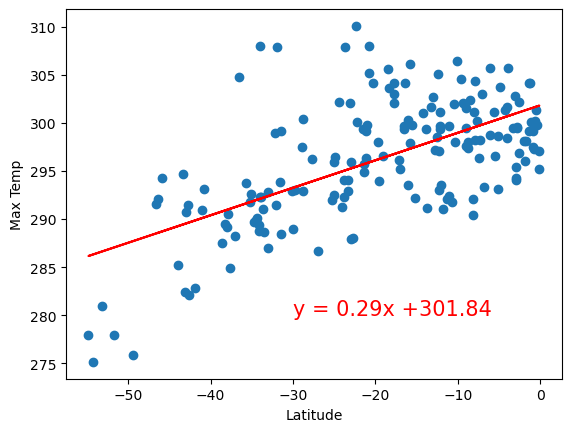

In [69]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_label = "Max Temp"
coordinates = (-30,280)

linear_regression_plot(x_values, y_values, y_label, coordinates)


**Discussion about the linear relationship:** 

There is a negative correlation between Latitude and Max Temperature in the northern hemisphere, meaning that the further north you go, or the further you get from the equator, the lower the maximum temperature. This is why countries like Canada and those in northern Europe have mild temperatures all year round. For the southern hemisphere, it is the same. The further south you go, the colder it will be due to the positive relationship as displayed in the graph. The max temperature near the equator is significantly higher than that of the south of Chile, for example.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04943515733128009


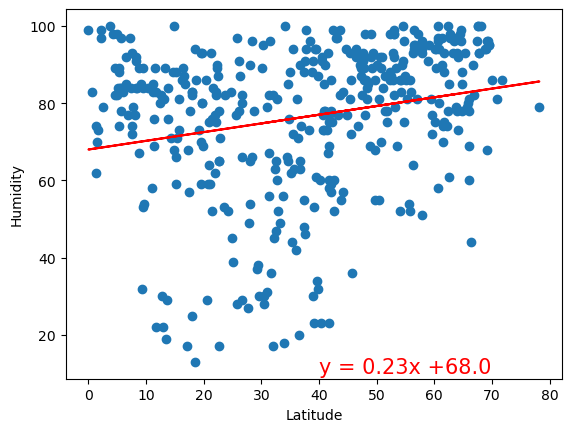

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label = "Humidity"
coordinates = (40,10)

linear_regression_plot(x_values, y_values, y_label, coordinates)

The r-value is: 0.019587416386937145


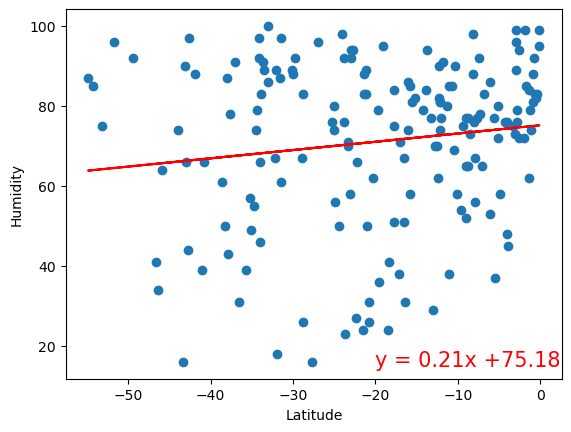

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label = "Humidity"
coordinates = (-20, 15)

linear_regression_plot(x_values, y_values, y_label, coordinates)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.015654612709200422


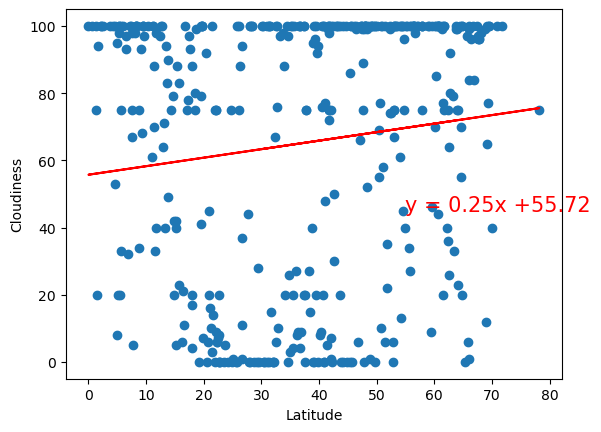

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
coordinates = (55,45)

linear_regression_plot(x_values, y_values, y_label, coordinates)

The r-value is: 0.00045374928342993456


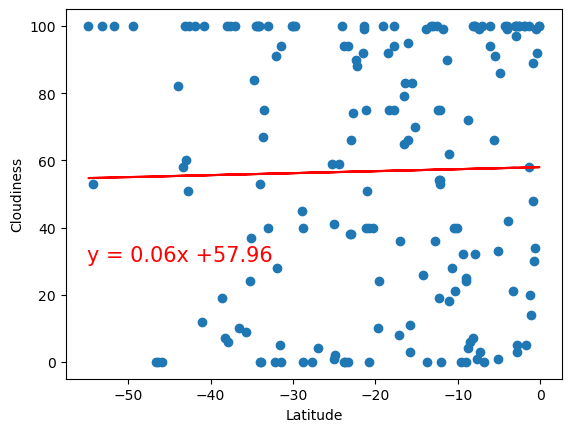

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
coordinates = (-55,30)

linear_regression_plot(x_values, y_values, y_label, coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009406929601892936


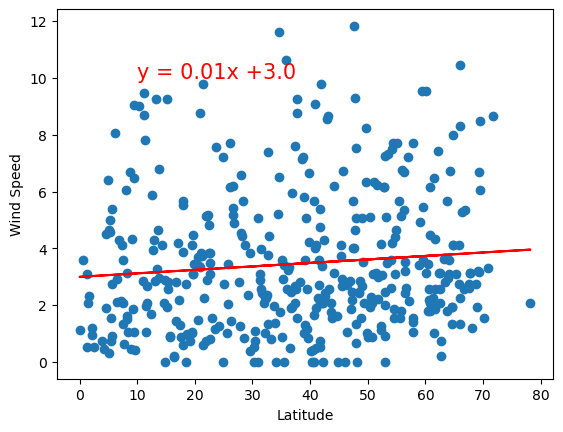

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
coordinates = (10,10)

linear_regression_plot(x_values, y_values, y_label, coordinates)

The r-value is: 0.06407892205779873


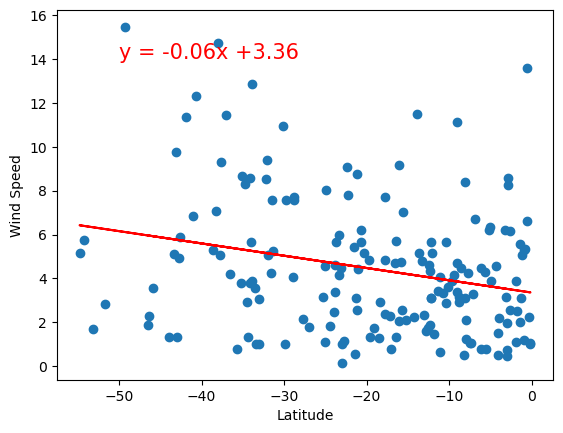

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
coordinates = (-50,14)

linear_regression_plot(x_values, y_values, y_label, coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE